# Electronic Band-Structure and Density of States
**by <span style="color:darkgreen">Jürgen Spitaler</span>, <span style="color:darkgreen">Lorenzo Pardini</span> & <span style="color:darkgreen">Pasquale Pavone</span> for [<span style="color:DarkGoldenRod">exciting *oxygen*</span>](http://exciting.wikidot.com/oxygen)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Mara Voiculescu</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**:  This tutorial gives a basic introduction into electronic-structure calculations. It explains how to set up and execute a simple **exciting** calculation, using elemental Ag as example. It is described how to prepare the input, how to run the calculation, and how to analyze the output. In addition, it is shown how basic properties like the density of states and the electronic band structure can be calculated.
<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">

**Table of Contents**

[0. General Preparation](#0)
    
[1. Electronic Structure of Silver: Ground-State Calculation](#1)
    
[2. Electronic Structure of Silver: Density of States](#2)
    
[3. Electronic Structure of Silver: Band Structure](#3)

</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. General Preparation</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **exciting**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>


**<span style="color:#15317E">Units in exciting</span>**

By default, all quantities in the **exciting** code are given in atomic units: **<span style="color:firebrick">Energies</span>** in **<span style="color:firebrick">Hartree</span>**, **<span style="color:firebrick">lengths</span>** in **<span style="color:firebrick">Bohr</span>**, *etc.* (see **[Input Reference](http://exciting.wikidot.com/ref:input)**). In case other units are desirable, they can be converted using templates as a post-processing to **exciting**'s standard output.


<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Electronic Structure of Silver: Ground-State Calculation</span>

The first step of any density-functional calculation is the determination of the ground-state total energy and electron density.

The starting point of a ground-state calculation is the crystal structure, only. At the beginning of a ground-state calculation, an initial electron density is generated, which is obtained from a superposition of atomic densities. Thus, this initial electron density lacks the interaction between atoms and is normally a rather crude approximation of the density.

Then, the calculation iteratively goes through the following steps:

   1. Determine the potential from the electron density.
   2. Solve the Kohn-Sham (**KS**) equations to get the eigenfunctions and eigenvalues as well as the total energy.
   3. Calculate the electron density from the **KS** eigenfunctions.
   4. Create a new charge density, mixing the electron density from the current iteration with the ones of previous iteration (to ensure a good convergence behavior).
   5. Start again with (1).

Such a sequence of steps is usually called an **iteration**. The code will repeat such iterations, until the potential (or total energy, or charge density, …) obtained at the end of the last iteration is consistent with the one of the previous iterations. Thus, this kind of calculations is often called **self-consistent field** (**SCF**) calculation, and an iteration is often referred to as an **SCF cycle**.

As a first step, you may set the **exciting_root** directory and create a running directory for the notebook.

In [1]:
import os
from excitingjupyter.utilities import get_exciting_root, check_for_binary

exciting_root = get_exciting_root()
check_for_binary(exciting_root)
exciting_species = os.path.join(exciting_root, "species")
print(exciting_root)

/home/mara/Pycharmprojects/exciting


In [5]:
%%bash
mkdir run_tutorial3

bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by bash)
mkdir: cannot create directory ‘run_tutorial3’: File exists


CalledProcessError: Command 'b'mkdir run_tutorial3\n'' returned non-zero exit status 1.

We start by creating an **exciting** (**xml**) input file called **input.xml** which should appear as the one below.

```xml
<input>

   <title>Electronic structure of silver</title>

   <structure speciespath="$EXCITINGROOT/species">
      <crystal scale="7.7201">
         <basevect>0.5 0.5 0.0</basevect>
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
      </crystal>
      <species speciesfile="Ag.xml" chemicalSymbol="Ag">
         <atom coord="0.0  0.0  0.0" />
      </species>
   </structure>

   <groundstate
      ngridk="8  8  8"
      outputlevel="normal"
      xctype="GGA_PBE_SOL">
   </groundstate>

</input>
```
The next step is writing the complete input as a string and saving it in your working directory as **input.xml**.

In [2]:
from excitingjupyter.utilities import re_input

# Convert markdown cell with input to string:
notebook = "tutorial3.ipynb"
xml_str = re_input(notebook, "Electronic structure of silver")
input_str = xml_str.replace("$EXCITINGROOT/species", f"{exciting_species}")

# Write out the input as an XML file:
with open(os.path.join(os.getcwd(), 'run_tutorial3/input.xml'), "w") as fid:
    fid.write(input_str)

In order to run **exciting** from the terminal, you simply need to execute the **exciting_smp** binary in the running directory. After a few seconds, the calculation should be finished. Here we used the <code>time</code> command before **exciting_smp** in order to get, at the end of the run, the elapsed time explicitly written on the screen.

In [ ]:
%%bash
cd run_tutorial3
# Set up environment. Note that this is platform-specific. With the Modules package you can e.g. use:
module load intel
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

If you wish, you can follow the progress by displaying the output to **INFO.OUT** with the command

<div style="background-color: rgb(224, 224, 224);">

```bash
tail -f INFO.OUT
```
</div>

which needs to be killed after **exciting** has stopped using **Ctrl+C**. The calculation should roughly take a few seconds. During the calculation, output files are created, which contain all kind of information on your material system and on the calculation. Some of the output files are already created at the beginning of the calculation and will not be changed anymore during the run. Output files created by **exciting** in a standard ground-state calculation are described in **<span style="color:#3366BB">How to start an exciting calculation</span>**.

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Electronic Structure of Silver: Density of States</span>

After you have completed the ground-state run and have obtained the corresponding total energy, you can go for more properties of the system. One of the most fundamental ones is the density of states (**DOS**). The **DOS** gives you information on the energy levels in your system, or — more precisely — about how many electronic states there are at any given energy.

To calculate it, you need to do the following simple modifications in **input.xml** (for more details, see **[Input Reference](http://exciting.wikidot.com/ref:input)**):

   1. add the attribute <code><span style="color:mediumblue">do</span>=<span style="color:firebrick">"skip"</span></code> to the element <code><span style="color:green">groundstate</span></code>;
   2. add the element <code><span style="color:green">properties</span></code> after the <code><span style="color:green">groundstate</span></code> element;
   3. insert the subelement <code><span style="color:green">dos</span></code> into the element <code><span style="color:green">properties</span></code>.
   4. add some attributes to the element <code><span style="color:green">dos</span></code> as shown below.

The corresponding part of the **input.xml** should now look like this:

```xml
...
   <groundstate
      do="skip"
      ngridk="8  8  8"
      outputlevel="normal"
      xctype="GGA_PBE_SOL">
   </groundstate>

   <properties>
      <dos
         nsmdos="2"
         ngrdos="300"
         nwdos="1000"
         winddos="-0.3 0.3">
      </dos>
   </properties>
...
```
Here, the attributes of the element <code><span style="color:green">dos</span></code> have the following meaning (see **[<span style="color:firebrick">here</span>](http://exciting.wikidot.com/ref:input)**) for more details):

   1. <code><span style="color:mediumblue">nsmdos</span></code> indicates the type of smearing for the resulting **DOS**.
   2.  <code><span style="color:mediumblue">ngrdos</span></code> is the effective **k**-point mesh size to be used for Brillouin-zone integration.
   3.  <code><span style="color:mediumblue">nwdos</span></code> is number of energy points in the **DOS**.
   4.  <code><span style="color:mediumblue">winddos</span></code> indicates the energy window, given in Hartree (Ha), for the **DOS** plot.

In [ ]:
dos_str = """<properties>
      <dos
         nsmdos="2"
         ngrdos="300"
         nwdos="1000"
         winddos="-0.3 0.3">
      </dos>
   </properties>
"""

do_skip = input_str.replace('fromscratch','skip')
dos_input = do_skip.replace('</input>', '') + dos_str + "</input>"

with open(os.path.join(os.getcwd(), 'run_tutorial3/input.xml'), "w") as fid:
    fid.write(dos_input)

If you wish to visualise the structure you can use  the visualization module of the Atomic Simulation Environment (**ASE**).

Note, visualization requires **tkinter** needs to be installed. Instructions are provided **[here](https://tkdocs.com/tutorial/install.html)** if your OS is missing it.

In [ ]:
import ase
from ase.visualize import view
import numpy as np

a=0.5*7.7201 # 0.5 from fcc-lattice multiplied by crystal scale
fcc_cell = np.array([[0.0, a, a], [a, 0.0, a], [a, a, 0.0]])
pos = [(0.0, 0.0, 0.0)]
atoms = ase.atoms.Atoms(symbols=['Ag'],
                        cell=fcc_cell,
                        scaled_positions=pos,
                        pbc=True)

view(atoms)

Then, run **exciting** again either from the terminal or in python:

In [ ]:
%%bash
cd run_tutorial3
module load intel
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

This time, the program will produce the following files:

filename|description
:-----------|:--------------------------------
**TDOS.OUT**|Total density of states.
**dos.xml**|Total density of states stored in the XML format.

#### <span style="color:#15317E">Plotting the DOS in python</span>

To visualize the **DOS**, you can plot it inside the jupyter notebook. This can be done by parsing the **TDOS.OUT** output file by python.

**<span style="color:firebrick">Please note</span>**:

Here, energies are relative to the Fermi energy, *i.e*., $E_F$ which corresponds to the energy zero.
As a default, energies in this **DOS** plot are given in **<span style="color:firebrick">electronvolts</span>** (eV) as it is used in most of the literature.

In [2]:
from excitingtools.exciting_obj_parsers.gw_eigenvalues import parse_obj_gw_dos
from scipy.constants import physical_constants

dos_out = os.path.join(os.getcwd(), 'run_tutorial3/TDOS.OUT')
dos_data = parse_obj_gw_dos(dos_out)

ha_to_ev = physical_constants["hartree-electron volt relationship"][0]
dos_data.energy = dos_data.energy * ha_to_ev
dos_data.dos = dos_data.dos / ha_to_ev

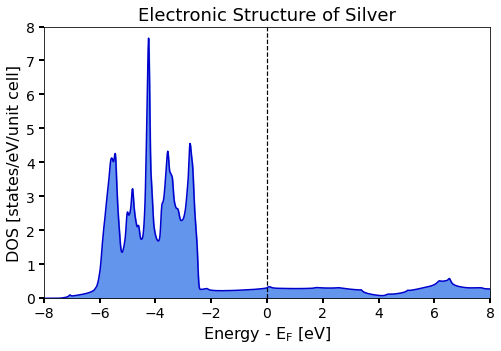

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.title("Electronic Structure of Silver", fontsize=18)
plt.xlabel("Energy - $\mathregular{E_F}$ [eV]", fontsize=16)
plt.ylabel("DOS [states/eV/unit cell]", fontsize=16)

plt.ylim([0, 8])
plt.xlim([-8,8])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(length=5,width=2)

e_fermi = 0.0
plt.axvline(x=e_fermi, color="black", linestyle='--', linewidth=1.2)

plt.rcParams["axes.linewidth"] = 2

plt.plot(dos_data.energy, dos_data.dos, color="mediumblue")
plt.fill_between(dos_data.energy, 0, dos_data.dos, color="cornflowerblue")

plt.show()

<a id='3'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">3. Electronic Structure of Silver: Band Structure</span>

Now, we are ready for a more detailed view on the electronic structure: The band structure. In addition to the energy of each state, the band structure shows the dependence of the energy eigenvalues on the coordinates in **k**-space.

To calculate the band structure of silver, insert the subelement <code><span style="color:green">bandstructure</span></code> in the element <code><span style="color:green">properties</span></code> with the following specifications:

```bash
...
   <properties>

      <bandstructure>
         <plot1d>
            <path steps="100">
               <point coord="1.0     0.0     0.0" label="Gamma"/>
               <point coord="0.625   0.375   0.0" label="K"/>
               <point coord="0.5     0.5     0.0" label="X"/>
               <point coord="0.0     0.0     0.0" label="Gamma"/>
               <point coord="0.5     0.0     0.0" label="L"/>
            </path>
         </plot1d>
      </bandstructure>

   </properties>
...
```

As you may have realized, we have removed the subelement <code><span style="color:green">dos</span></code> now. The new element <code><span style="color:green">bandstructure</span></code> allows for the calculation of energy eigenvalues as a function of **k**. Inside this element, the subelement <code><span style="color:green">plot1d</span></code> creates a line plot where the abscissa is taken along a path consisting of straight lines joining the points defined by each element <code><span style="color:green">point</span></code>. The coordinates of these points are given in terms of the basis vectors of the reciprocal lattice. The number of points along the full path, for which the ordinate(s) of the line plot (in this case the **KS** energies) are calculated, is established by the element <code><span style="color:green">path</span></code>.

Here, we choose a simple **path** containing the directions in reciprocal space with the highest symmetry. Standard paths in reciprocal space for general crystals can be found in **[Setyawan & Curtarolo, Comp. Mat. Sci. 49, 299-312 (2010)](http://materials.duke.edu/auro/AUROARTICULA/j.commatsci.2010.05.010.pdf)**. For a face-centered cubic crystal, as in the example of this tutorial, the path is visualized in the following figure.

<div>
<img src="tutorial3_images/standards.png" width="500" align="left"/>
</div>

Now, write out the new input as an **XML** file and run the **exciting** code again.

In [ ]:
band_str = """<properties>
      <bandstructure>
         <plot1d>
            <path steps="100">
               <point coord="1.0     0.0     0.0" label="Gamma"/>
               <point coord="0.625   0.375   0.0" label="K"/>
               <point coord="0.5     0.5     0.0" label="X"/>
               <point coord="0.0     0.0     0.0" label="Gamma"/>
               <point coord="0.5     0.0     0.0" label="L"/>
            </path>
         </plot1d>
      </bandstructure>
   </properties>
"""

band_input = do_skip.replace('</input>', '') + band_str + "</input>"

with open(os.path.join(os.getcwd(), 'run_tutorial3/input.xml'), "w") as fid:
     fid.write(band_input)

In [ ]:
%%bash
cd run_tutorial3 
module load intel
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

#### <span style="color:#15317E">Plotting the Band Structure in python</span>

Similarly to the case of the DOS, the band structure can also be plotted inside the jupyter notebook by parsing the **bandstructure.xml** output file:

In [5]:
from excitingtools.exciting_obj_parsers.ks_band_structure import parse_band_structure

bandstructure_xml = os.path.join(os.getcwd(), 'run_tutorial3/bandstructure.xml')
band_data = parse_band_structure(bandstructure_xml)

band_data.bands = band_data.bands * ha_to_ev
band_data.e_fermi = 0.0
vertices = band_data.band_path()[0]
labels = band_data.band_path()[1]

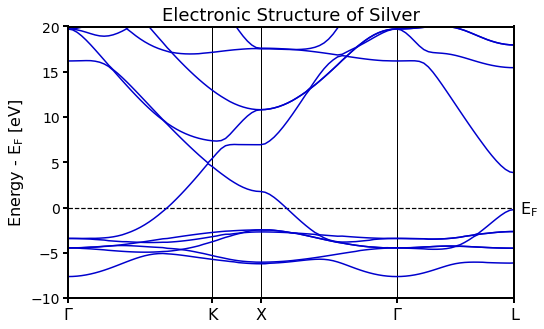

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.title("Electronic Structure of Silver", fontsize=18)
plt.ylabel("Energy - $\mathregular{E_F}$ [eV]", fontsize=16)
plt.ylim([-10, 20])
plt.xlim([vertices[0],vertices[-1]])

plt.xticks(ticks=vertices, labels=labels, fontsize=16)
plt.yticks(fontsize=14)
plt.tick_params(length=5,width=2)

plt.axhline(y=band_data.e_fermi, color="black", linestyle='--', linewidth=1.2)

for i in range(len(band_data.vertices)):
    plt.axvline(x=vertices[i], color="black",linewidth=1)

plt.rcParams["axes.linewidth"] = 2

plt.text(2.7, -0.6, "$\mathregular{E_F}$", fontsize=16)

plt.plot(band_data.flattened_k_points, band_data.bands, color="mediumblue")

plt.show()